In [142]:
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [143]:
d = pd.read_csv("Data.csv")
df = d.copy()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [144]:
print(df.shape)
print(df.ndim)
print(df.size)

(7043, 21)
2
147903


In [145]:
encoding_col=[]
for i in df.select_dtypes(include="object"):   
    print(i,"-->",df[i].nunique())
    encoding_col.append(i)

customerID --> 7043
gender --> 2
Partner --> 2
Dependents --> 2
PhoneService --> 2
MultipleLines --> 3
InternetService --> 3
OnlineSecurity --> 3
OnlineBackup --> 3
DeviceProtection --> 3
TechSupport --> 3
StreamingTV --> 3
StreamingMovies --> 3
Contract --> 3
PaperlessBilling --> 2
PaymentMethod --> 4
TotalCharges --> 6531
Churn --> 2


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [147]:
no_nump_vars = [var for var in df.columns if df[var].dtypes == "O"]
print("Non-numeric attributes: ", len(no_nump_vars))
df[no_nump_vars]

Non-numeric attributes:  18


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [148]:
num_vars = [var for var in df.columns if df[var].dtypes != "O"]
print("Numeric attributes: ", len(num_vars))
df[num_vars]

Numeric attributes:  3


,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [149]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = "coerce")
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [150]:
df[np.isnan(df["TotalCharges"])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [151]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [152]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [153]:
df.describe(include=["O"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [154]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [155]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [156]:
df2 = df

In [157]:
df2.drop(["customerID"], axis = 1, inplace=True)
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [158]:
df2["Churn"].replace(to_replace = "Yes", value=1, inplace=True)
df2["Churn"].replace(to_replace = "No",  value=0, inplace=True)

In [159]:
print (df2["Churn"].value_counts(ascending=True))

1    1869
0    5174
Name: Churn, dtype: int64


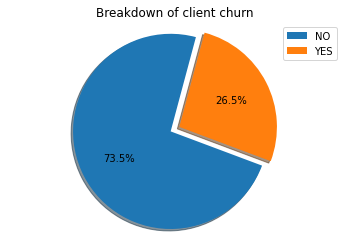

In [160]:
sizes = [5174,1869]
labels = "NO","YES"
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct="%1.1f%%",shadow=True, startangle=75 )
ax1.axis("equal") 
ax1.set_title("Breakdown of client churn")

ax1.legend(labels)

plt.show()

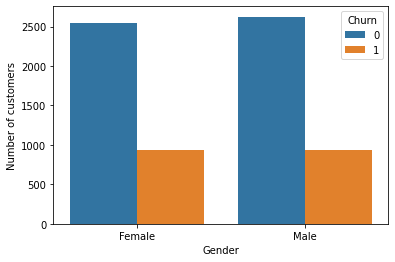

Churn,0,1
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


In [161]:
sns.countplot(x="gender", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("Gender")
plt.ylabel("Number of customers")
plt.show()
df2.groupby('gender')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

In [162]:
print (df2["SeniorCitizen"].value_counts(ascending=True))

1    1142
0    5901
Name: SeniorCitizen, dtype: int64


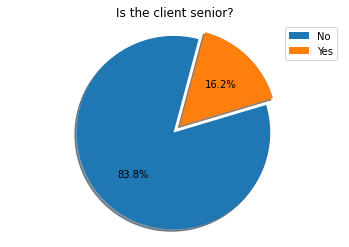

In [163]:
sizes = [5901,1142]
labels = "No","Yes"
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct="%1.1f%%",shadow=True, startangle=75 )
ax1.axis("equal") 
ax1.set_title("Is the client senior?")

ax1.legend(labels)

plt.show()

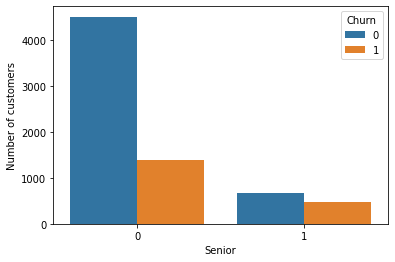

Churn,0,1
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


In [164]:
sns.countplot(x="SeniorCitizen", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("Senior")
plt.ylabel("Number of customers")
plt.show()
df2.groupby('SeniorCitizen')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

In [165]:
print (df2["Partner"].value_counts(ascending=True))

Yes    3402
No     3641
Name: Partner, dtype: int64


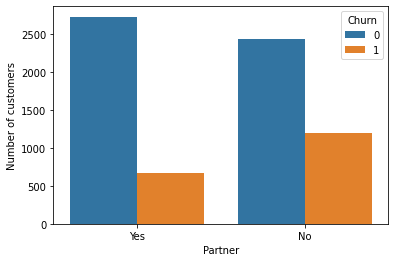

Churn,0,1
Partner,,
No,0.670420,0.329580
Yes,0.803351,0.196649


In [166]:
sns.countplot(x="Partner", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("Partner")
plt.ylabel("Number of customers")
plt.show()
df2.groupby('Partner')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

In [167]:
print (df2["Dependents"].value_counts(ascending=True))

Yes    2110
No     4933
Name: Dependents, dtype: int64


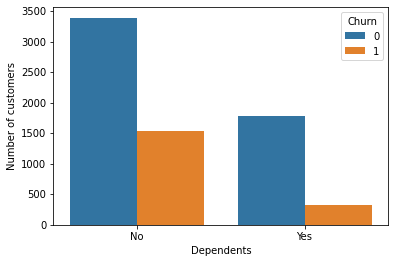

Churn,0,1
Dependents,,
No,0.687209,0.312791
Yes,0.845498,0.154502


In [168]:
sns.countplot(x="Dependents", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("Dependents")
plt.ylabel("Number of customers")
plt.show()
df2.groupby('Dependents')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

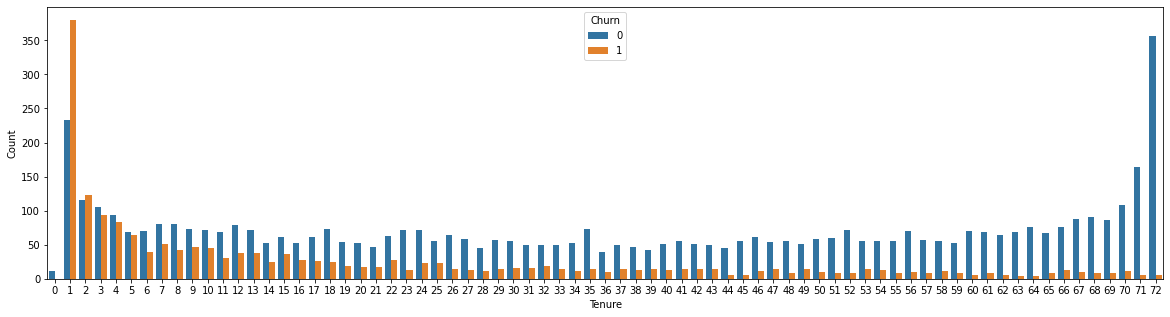

Churn,0,1
tenure,,
0,1.000000,0.000000
1,0.380098,0.619902
2,0.483193,0.516807
3,0.530000,0.470000
4,0.528409,0.471591
...,...,...
68,0.910000,0.090000
69,0.915789,0.084211
70,0.907563,0.092437


In [169]:
plt.figure(figsize = (20, 5))
sns.countplot(x="tenure", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()
df2.groupby('tenure')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

/Users/marek/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Months')

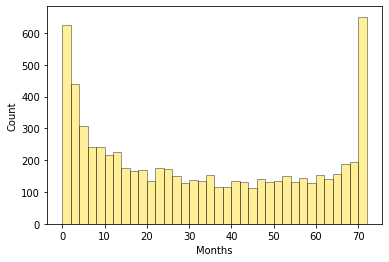

In [170]:
ax = sns.distplot(df2["tenure"], hist=True, kde=False, bins=int(180/5), color = "gold", hist_kws={"edgecolor":'black'}, kde_kws={"linewidth": 4})
ax.set_ylabel("Count")
ax.set_xlabel("Months")

<AxesSubplot:>

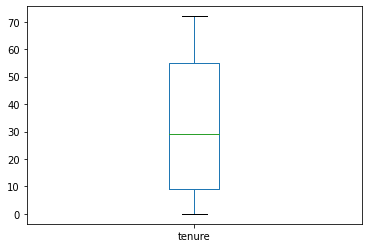

In [171]:
df2.boxplot(column = ["tenure"], grid = False)

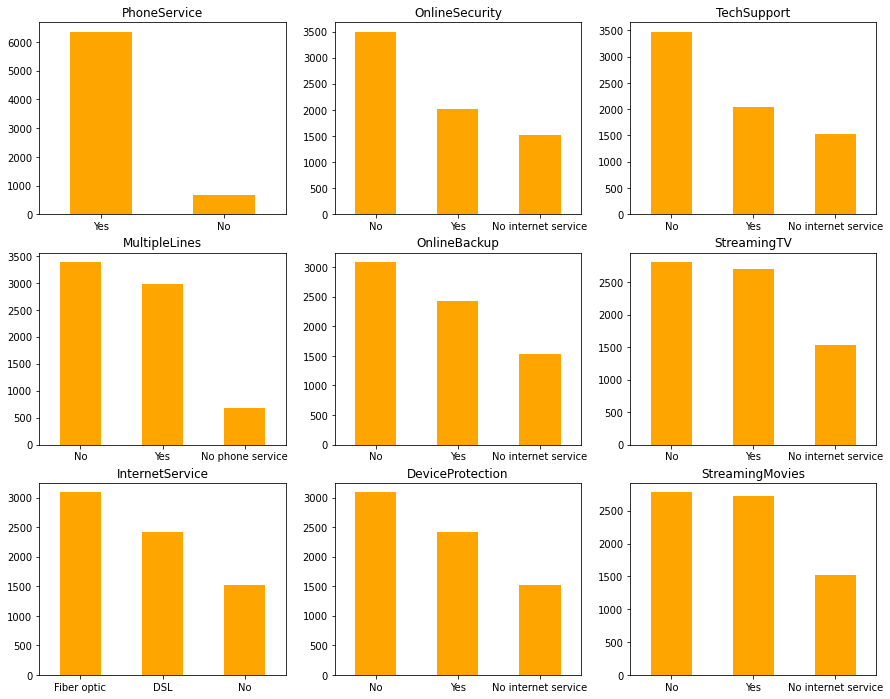

In [172]:
Services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(Services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = "bar",ax=axes[i,0],rot = 0, color = "orange")
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = "bar",ax=axes[i-3,1],rot = 0,  color = "orange")
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = "bar",ax=axes[i-6,2],rot = 0, color = "orange")
    ax.set_title(item)

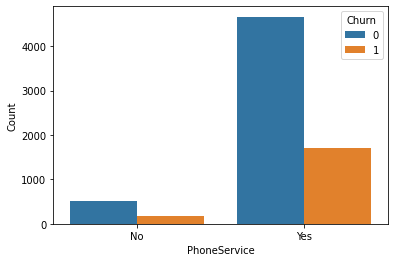

Churn,0,1
PhoneService,,
No,0.750733,0.249267
Yes,0.732904,0.267096


In [173]:
sns.countplot(x="PhoneService", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("PhoneService")
plt.ylabel("Count")
plt.show()
df2.groupby('PhoneService')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

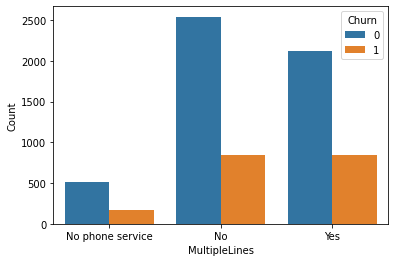

Churn,0,1
MultipleLines,,
No,0.749558,0.250442
No phone service,0.750733,0.249267
Yes,0.713901,0.286099


In [174]:
sns.countplot(x="MultipleLines", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("MultipleLines")
plt.ylabel("Count")
plt.show()
df2.groupby('MultipleLines')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

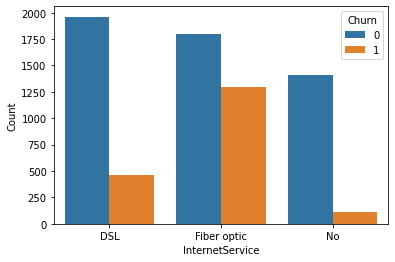

Churn,0,1
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


In [175]:
sns.countplot(x="InternetService", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("InternetService")
plt.ylabel("Count")
plt.show()
df2.groupby('InternetService')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

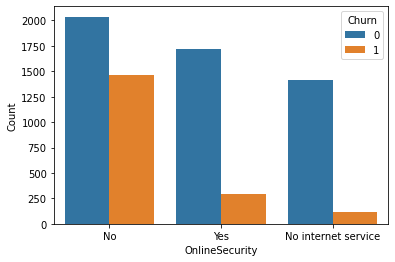

Churn,0,1
OnlineSecurity,,
No,0.582333,0.417667
No internet service,0.925950,0.074050
Yes,0.853888,0.146112


In [176]:
sns.countplot(x="OnlineSecurity", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("OnlineSecurity")
plt.ylabel("Count")
plt.show()
df2.groupby('OnlineSecurity')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

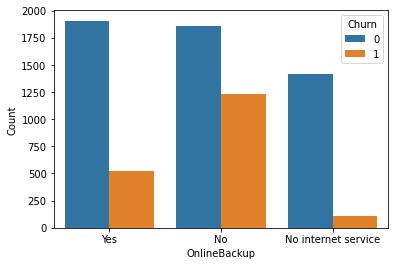

Churn,0,1
OnlineBackup,,
No,0.600712,0.399288
No internet service,0.925950,0.074050
Yes,0.784685,0.215315


In [177]:
sns.countplot(x="OnlineBackup", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("OnlineBackup")
plt.ylabel("Count")
plt.show()
df2.groupby('OnlineBackup')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

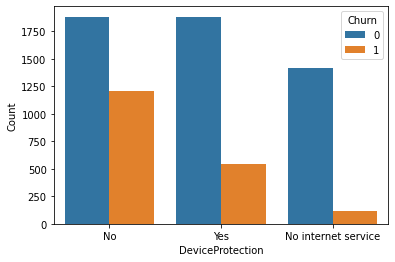

Churn,0,1
DeviceProtection,,
No,0.608724,0.391276
No internet service,0.925950,0.074050
Yes,0.774979,0.225021


In [178]:
sns.countplot(x="DeviceProtection", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("DeviceProtection")
plt.ylabel("Count")
plt.show()
df2.groupby('DeviceProtection')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

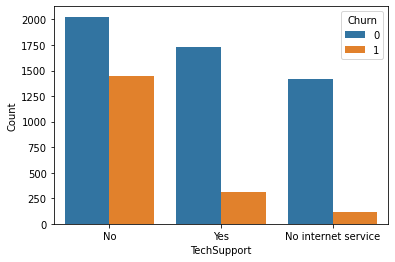

Churn,0,1
TechSupport,,
No,0.583645,0.416355
No internet service,0.925950,0.074050
Yes,0.848337,0.151663


In [179]:
sns.countplot(x="TechSupport", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("TechSupport")
plt.ylabel("Count")
plt.show()
df2.groupby('TechSupport')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

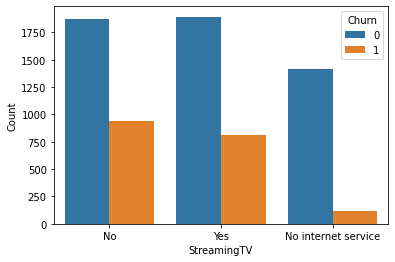

Churn,0,1
StreamingTV,,
No,0.664769,0.335231
No internet service,0.925950,0.074050
Yes,0.699298,0.300702


In [180]:
sns.countplot(x="StreamingTV", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("StreamingTV")
plt.ylabel("Count")
plt.show()
df2.groupby('StreamingTV')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

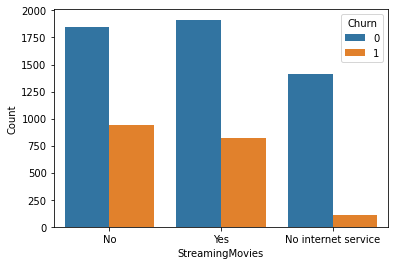

Churn,0,1
StreamingMovies,,
No,0.663196,0.336804
No internet service,0.925950,0.074050
Yes,0.700586,0.299414


In [181]:
sns.countplot(x="StreamingMovies", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("StreamingMovies")
plt.ylabel("Count")
plt.show()
df2.groupby('StreamingMovies')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

Text(0.5, 1.0, 'Distribution of customers based on the contract')

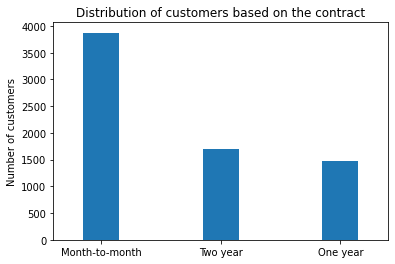

In [182]:
ax = df2["Contract"].value_counts().plot(kind = "bar",rot = 0, width = 0.3)
ax.set_ylabel("Number of customers")
ax.set_title("Distribution of customers based on the contract")

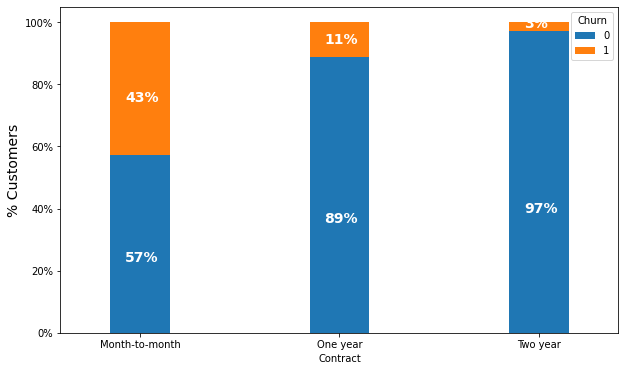

In [183]:
contract_churn = df2.groupby(["Contract","Churn"]).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind="bar", width = 0.3, stacked = True, rot = 0, figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="best",prop={"size":10},title = "Churn")
ax.set_ylabel("% Customers",size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0f}%".format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = "white", weight = "bold", size = 14)

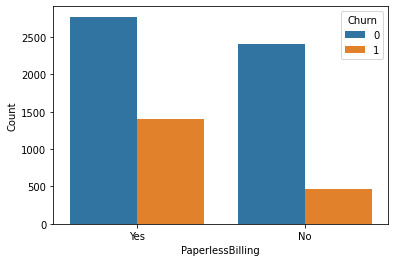

Churn,0,1
PaperlessBilling,,
No,0.836699,0.163301
Yes,0.664349,0.335651


In [184]:
sns.countplot(x="PaperlessBilling", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("PaperlessBilling")
plt.ylabel("Count")
plt.show()
df2.groupby('PaperlessBilling')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

In [185]:
print (df2["PaperlessBilling"].value_counts(ascending=True))

No     2872
Yes    4171
Name: PaperlessBilling, dtype: int64


Text(0.5, 1.0, 'Distribution of customers based on payment method')

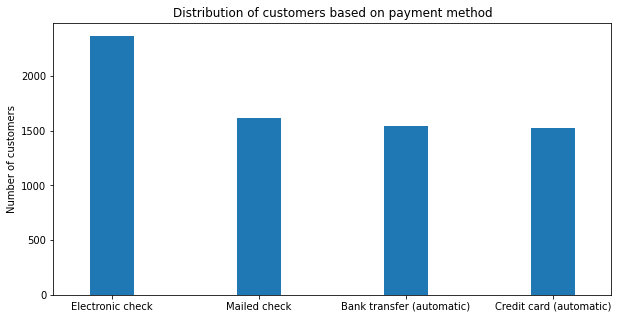

In [186]:
plt.figure(figsize = (10, 5))
ax = df["PaymentMethod"].value_counts().plot(kind = "bar",rot = 0, width = 0.3)
ax.set_ylabel("Number of customers")
ax.set_title("Distribution of customers based on payment method")

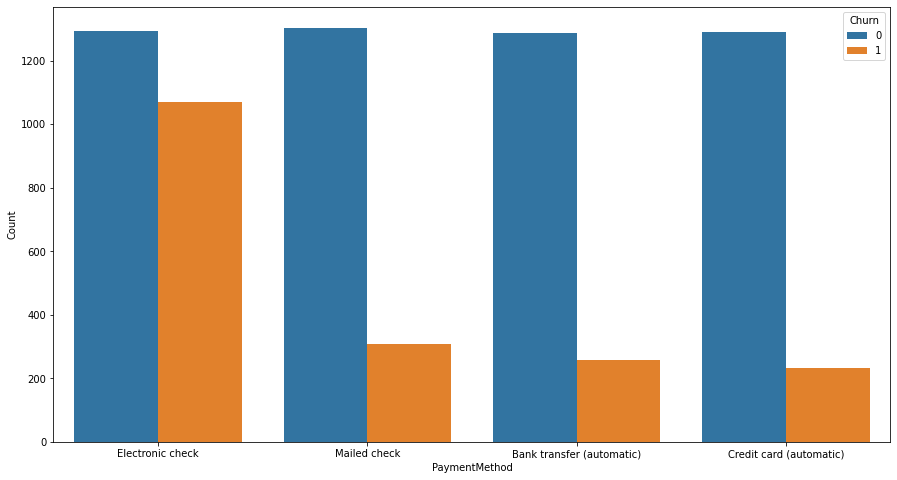

Churn,0,1
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [187]:
plt.figure(figsize=(15,8))
sns.countplot(x="PaymentMethod", hue="Churn", data=df2)
plt.xticks()
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.show()
df2.groupby('PaymentMethod')["Churn"].value_counts(normalize=True).unstack(fill_value=0)

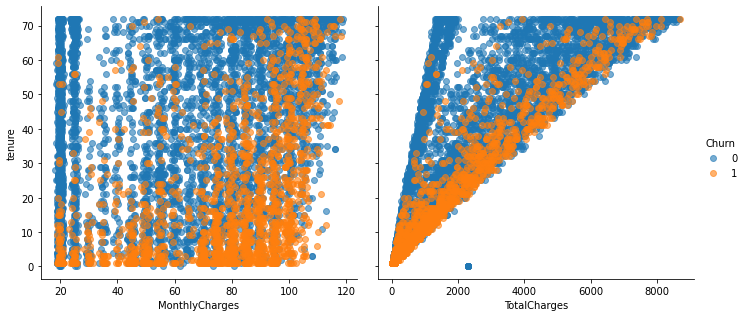

In [188]:
g = sns.PairGrid(df2, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)
g.add_legend()

<AxesSubplot:>

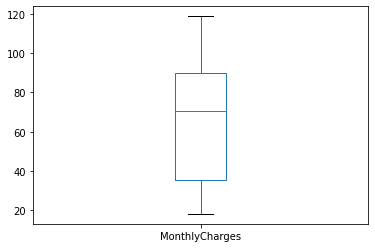

In [189]:
df2.boxplot(column = ["MonthlyCharges"], grid = False)

<AxesSubplot:>

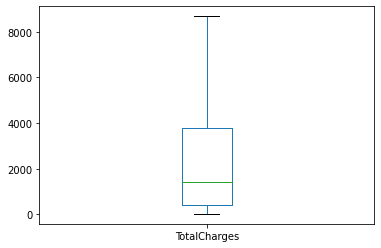

In [190]:
df2.boxplot(column = ["TotalCharges"], grid = False)

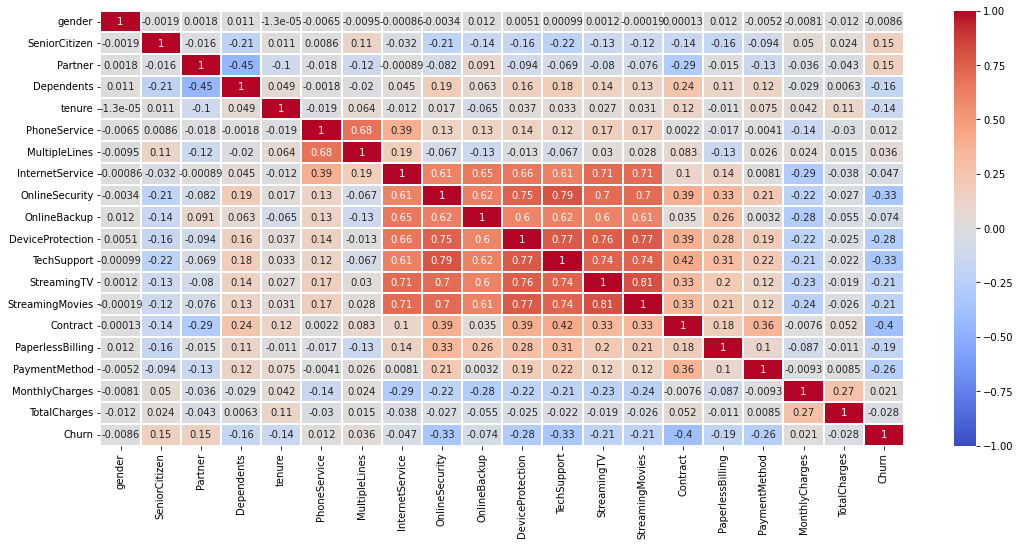

In [191]:
plt.figure(figsize=(18, 8))

corr = df2.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

In [192]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [193]:
print(df2.shape)
print(df_dummies.shape)

(7043, 20)
(7043, 46)


<AxesSubplot:>

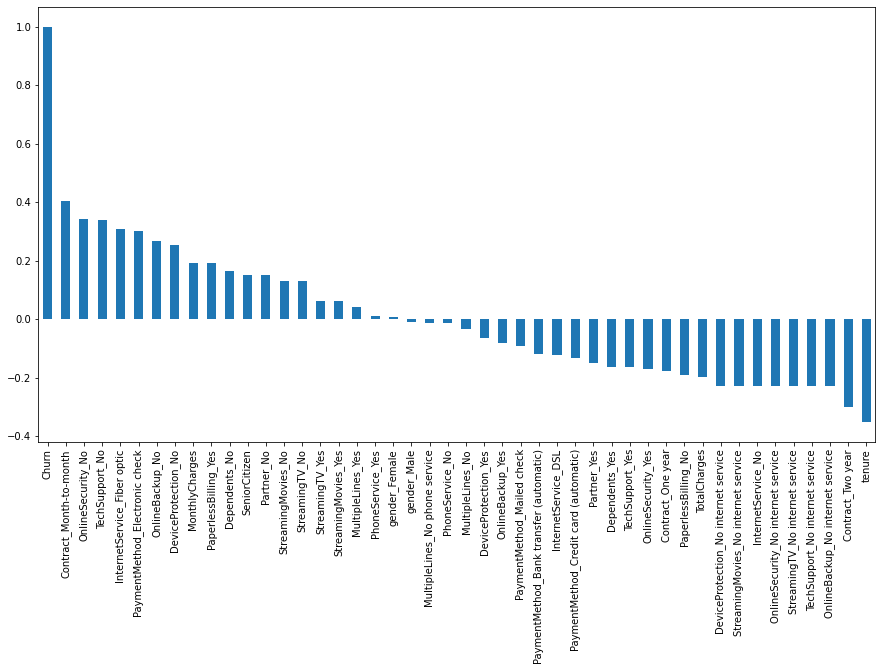

In [194]:
plt.figure(figsize=(15,8))
df_dummies.corr()["Churn"].sort_values(ascending = False).plot(kind="bar")

In [195]:
y = df_dummies["Churn"].values
X = df_dummies.drop(columns = ["Churn"])

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [197]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
print (metrics.accuracy_score(y_test, predictdt_y))

0.7239176721078779


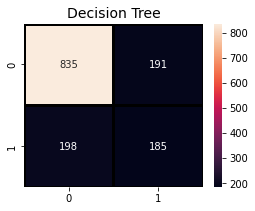

In [198]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, predictdt_y), annot=True,fmt = "d",linecolor = "k",linewidths = 3)
    
plt.title("Decision Tree",fontsize = 14)
plt.show()

In [199]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1026
           1       0.49      0.48      0.49       383

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.72      0.72      0.72      1409



In [200]:
model1 = GaussianNB()
result1 = model1.fit(X_train, y_train)
prediction_test1 = model1.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test1))

0.7061745919091554


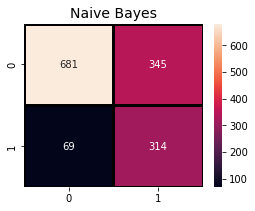

In [201]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test1), annot=True,fmt = "d",linecolor="k",linewidths = 3)
    
plt.title("Naive Bayes", fontsize = 14)
plt.show()

In [202]:
print(classification_report(y_test, prediction_test1))

              precision    recall  f1-score   support

           0       0.91      0.66      0.77      1026
           1       0.48      0.82      0.60       383

    accuracy                           0.71      1409
   macro avg       0.69      0.74      0.68      1409
weighted avg       0.79      0.71      0.72      1409



In [203]:
run = df2

In [204]:
run.drop(["PhoneService" ,"MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"], axis = 1, inplace=True)

In [205]:
run

,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [206]:
df_dummies_run = pd.get_dummies(run)
df_dummies_run.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0


In [207]:
y = df_dummies_run["Churn"].values
X = df_dummies_run.drop(columns = ["Churn"])

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [209]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
print (metrics.accuracy_score(y_test, predictdt_y))

0.7288857345635202


In [210]:
model1 = GaussianNB()
result1 = model1.fit(X_train, y_train)
prediction_test1 = model1.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test1))

0.7217885024840313
